In [1]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
matplotlib.rcParams['font.family']='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [46]:
xrp = fdr.DataReader('XRP/KRW','2018-01-01','2025-12-01').round().astype('int64')
btc = fdr.DataReader('BTC/KRW','2018-01-01','2025-12-01').round().astype('int64')
eth = fdr.DataReader('ETH/KRW','2018-01-01','2025-12-01').round().astype('int64')
inx = fdr.DataReader('IXIC','2018-01-01','2025-12-01').round(0).astype('Int64').drop(columns=['Adj Close'])

In [3]:
btc

,Open,High,Low,Close,Volume,Adj Close
2017-12-31,13753721,15329903,13600658,15094262,12940329363200,15094262
2018-01-01,15047133,15046287,14026068,14548333,10962700800000,14548333
2018-01-02,14514031,16400157,13990142,15918331,17899344238000,15918331
2018-01-03,15914188,16565566,15788165,16172952,17950689456200,16172952
2018-01-04,16247109,16707220,15433904,16552935,23115024576400,16552935
...,...,...,...,...,...,...
2025-11-26,128050376,133364488,127336448,133208456,97857149976959,133208456
2025-11-27,133207568,134314848,132251336,133495440,83416024888293,133495440
2025-11-28,133495448,136592832,132528296,133435848,89372547406528,133435848
2025-11-29,133435072,133829688,132468560,133336760,55655132376176,133336760


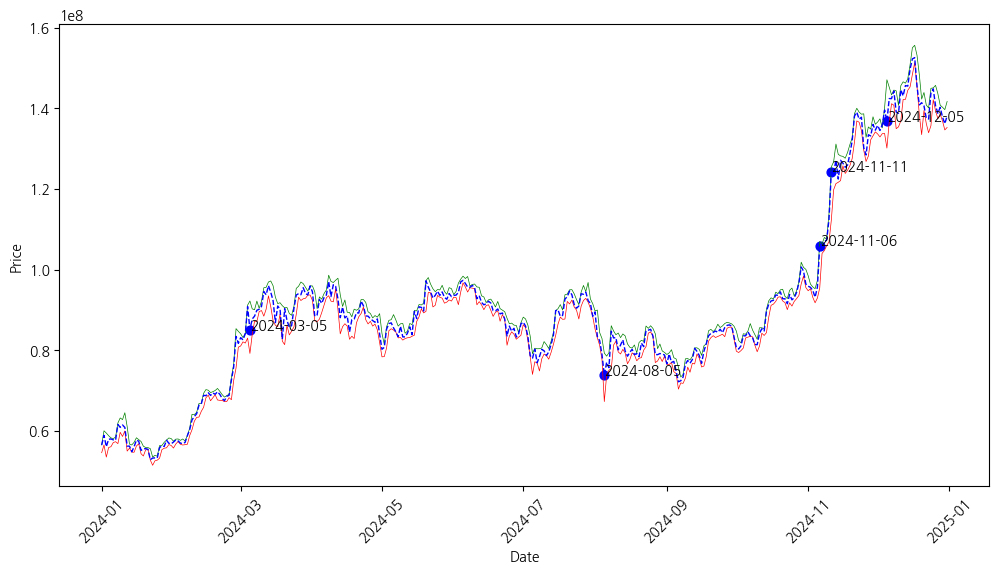

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
btc20=btc.loc['2024']
btc_diff=btc20['High']-btc20['Low']
btc_diff_5=btc_diff.nlargest(5)

ax.plot(btc20.index, btc20['High'], label='최고가', color='green', linewidth=0.5)
ax.plot(btc20.index, btc20['Low'], label='최저가', color='red', linewidth=0.5)
ax.plot(btc20.index, btc20['Close'], label='종가', color='blue', linewidth=1,linestyle='--')

for a,b,c in zip(btc_diff_5.index,btc20.loc[btc_diff_5.index]['Close'],btc_diff_5.index.astype(str).str[:10]):
    plt.scatter(a,b,color='blue',s=40)
    plt.text(a,b,c)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.xticks(rotation=45)
plt.show()

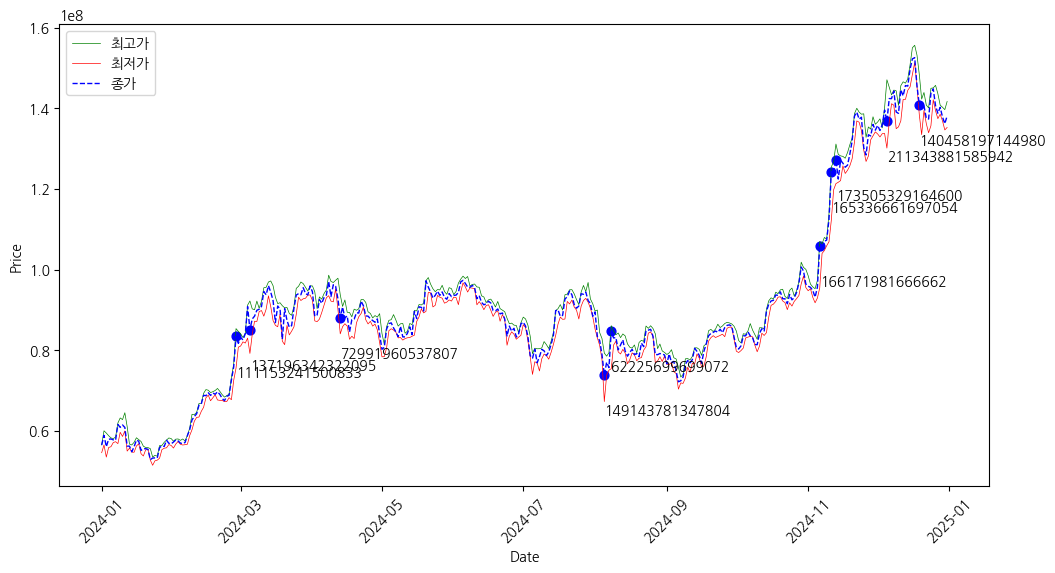

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
btc20=btc.loc['2024']
btc_diff=btc20['High']-btc20['Low']
btc_diff_top=btc_diff.nlargest(10)
hldata={}


ax.plot(btc20.index, btc20['High'], label='최고가', color='green', linewidth=0.5)
ax.plot(btc20.index, btc20['Low'], label='최저가', color='red', linewidth=0.5)
ax.plot(btc20.index, btc20['Close'], label='종가', color='blue', linewidth=1,linestyle='--')
#btc_diff_top.index.astype(str).str[:10]
for a,b,c in zip(btc_diff_top.index,btc20.loc[btc_diff_top.index]['Close'],btc20.loc[btc_diff_top.index]['Volume']):
    plt.scatter(a,b,color='blue',s=40)
    plt.text(a,b-10000000,c)
    hldata[a]=b

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [24]:
top10=btc20.loc[btc_diff_top.index]['Volume']
btc_all=btc20['Volume'].mean()
btc_diff_top


2024-12-05    16936776
2024-11-11    13223408
2024-03-05    12998232
2024-08-05    12009456
2024-11-06    11530536
2024-08-08    10650824
2024-12-19     9992976
2024-11-13     9810416
2024-02-28     9777968
2024-04-13     9681208
dtype: int64

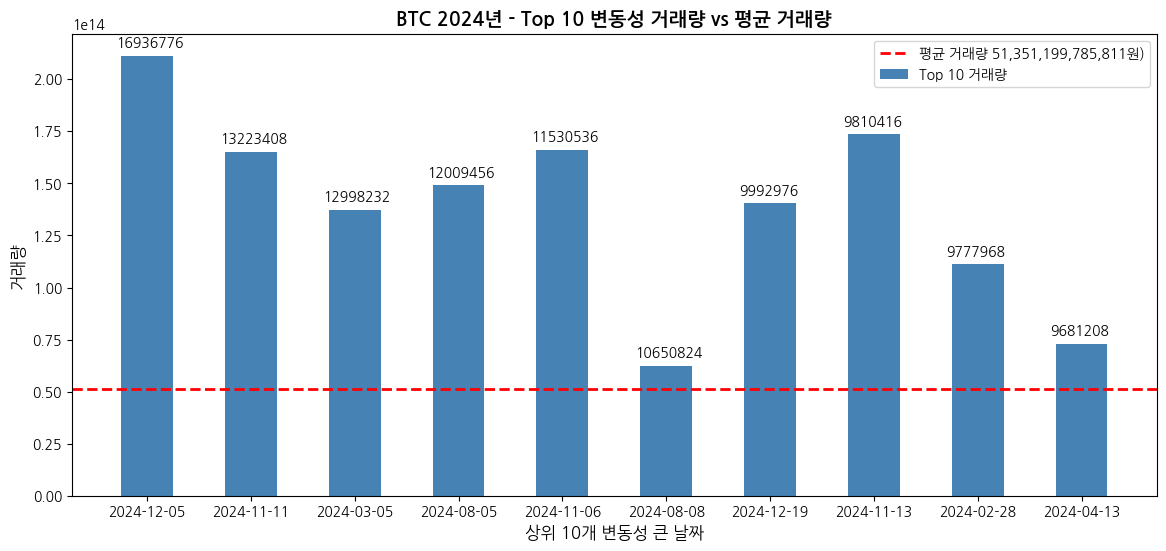

In [45]:
fig, ax = plt.subplots(figsize=(14, 6))
list=[i for i in range(len(top10))]

ax.bar(list, top10.values, width=0.5, label='Top 10 거래량', color='steelblue')
ax.axhline(y=btc_all, color='red', linestyle='--', linewidth=2, label=f'평균 거래량 {btc_all:,.0f}원)')

ax.set_xlabel('상위 10개 변동성 큰 날짜', fontsize=12)
ax.set_ylabel('거래량', fontsize=12)
ax.set_title('BTC 2024년 - Top 10 변동성 거래량 vs 평균 거래량', fontsize=14, fontweight='bold')

for a,b,c in zip(list,btc20.loc[btc_diff_top.index]['Volume'],btc_diff_top.values):
    plt.text(a-0.3,b+4000000000000,c)
    hldata[a]=b


ax.legend()
plt.xticks(list,btc_diff_top.index.astype(str).str[:10])
plt.show()